## Working with `numpy` arrays
- RDataFrame offers interoperability with `numpy` arrays. 

- It can be created from a dictionary of such arrays and it can also export its contents to the same format. 

- All operations are available also when using the `numpy`-based dataset.

- **Note:** this support is limited to one-dimensional numpy arrays, which are directly mapped to columns in the RDataFrame.

In [1]:
import numpy
import ROOT

np_dict = {colname: numpy.random.rand(100) for colname in ["a","b","c"]}

df = ROOT.RDF.FromNumpy(np_dict)

print(f"Columns in the RDataFrame: {df.GetColumnNames()}")

Columns in the RDataFrame: { "a", "b", "c" }


Number of rows in the dataset: 100
Average value of column a: 0.48921477639247996


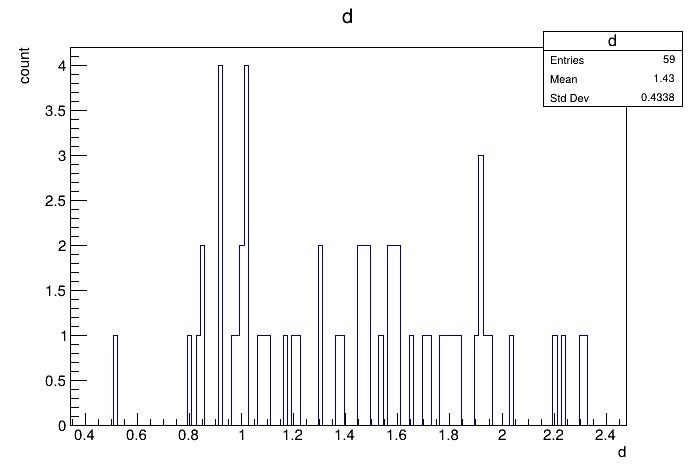

In [2]:
co = df.Count()
m_a = df.Mean("a")

fil1 = df.Filter("c < 0.7")
def1 = fil1.Define("d", "a+b+c")
h = def1.Histo1D("d")

c = ROOT.TCanvas()
h.Draw()

print(f"Number of rows in the dataset: {co.GetValue()}")
print(f"Average value of column a: {m_a.GetValue()}")
c.Draw()

In [3]:
# Export the modified dataframe to a dictionary of numpy arrays

np_dict_mod = def1.AsNumpy()

np_dict_mod

{'a': ndarray([0.35663887, 0.18288054, 0.13945408, 0.84403814, 0.7675917 ,
          0.46709406, 0.39817288, 0.43298707, 0.19102232, 0.65400261,
          0.49458541, 0.45784557, 0.27529458, 0.67782611, 0.95573896,
          0.95073836, 0.62535428, 0.54411688, 0.62116484, 0.75356698,
          0.86821219, 0.22346109, 0.15338141, 0.26375769, 0.36376758,
          0.55608815, 0.93771958, 0.95965317, 0.17919292, 0.62048719,
          0.77780525, 0.49364283, 0.03306324, 0.33254398, 0.91168613,
          0.22858143, 0.83758323, 0.78835353, 0.94971123, 0.14400142,
          0.97414147, 0.85192082, 0.28306534, 0.09160143, 0.00108422,
          0.47005179, 0.52228571, 0.91299077, 0.94467149, 0.53051214,
          0.9237502 , 0.60914812, 0.25039663, 0.47605016, 0.29358855,
          0.63140268, 0.2481417 , 0.21119568, 0.37920118]),
 'b': ndarray([0.55964995, 0.35629299, 0.76539779, 0.99434058, 0.50630448,
          0.77326795, 0.14503139, 0.71117003, 0.53938836, 0.55185374,
          0.33355514

In [6]:
df.Display(df.GetColumnNames(), df.Count().GetValue()).Print()

+-----+----------+----------+----------+
| Row | a        | b        | c        | 
+-----+----------+----------+----------+
| 0   | 0.571572 | 0.406734 | 0.973018 | 
+-----+----------+----------+----------+
| 1   | 0.202523 | 0.575846 | 0.862338 | 
+-----+----------+----------+----------+
| 2   | 0.356639 | 0.559650 | 0.384134 | 
+-----+----------+----------+----------+
| 3   | 0.182881 | 0.356293 | 0.264253 | 
+-----+----------+----------+----------+
| 4   | 0.693288 | 0.036285 | 0.970740 | 
+-----+----------+----------+----------+
| 5   | 0.139454 | 0.765398 | 0.548461 | 
+-----+----------+----------+----------+
| 6   | 0.942940 | 0.570549 | 0.952993 | 
+-----+----------+----------+----------+
| 7   | 0.844038 | 0.994341 | 0.371847 | 
+-----+----------+----------+----------+
| 8   | 0.767592 | 0.506304 | 0.564757 | 
+-----+----------+----------+----------+
| 9   | 0.467094 | 0.773268 | 0.572713 | 
+-----+----------+----------+----------+
| 10  | 0.498935 | 0.367709 | 0.849055 | 
+---

## Working with `pandas` dataframe

As a convenience, RDataFrame can also ingest data from a [`pandas`](https://pandas.pydata.org/) dataframe.

In [7]:
import pandas as pd

# Let's create some data in a pandas dataframe
pdf = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})

# Convert the Pandas DataFrame to RDataFrame
# The column names are directly copied to the RDF 
# Please note that only fundamental types (int, float, ...) are supported and
# the arrays must have the same length.
df = ROOT.RDF.FromPandas(pdf)

# You can now use the RDataFrame as usually, e.g. add a column ...
df = df.Define('z', 'x + y')

# ... or print the content
df.Display().Print()

+-----+---+---+---+
| Row | x | y | z | 
+-----+---+---+---+
| 0   | 1 | 4 | 5 | 
+-----+---+---+---+
| 1   | 2 | 5 | 7 | 
+-----+---+---+---+
| 2   | 3 | 6 | 9 | 
+-----+---+---+---+


## Working with `awkward` arrays

Utility functions are available for interoperability with the `awkward` library, described at https://awkward-array.org/doc/main/user-guide/how-to-convert-rdataframe.html.

The function for RDataFrame to Awkward conversion is ak.from_rdataframe(). The argument to this function accepts a tuple of strings that are the RDataFrame column names. By default this function returns ak.Array type.

In [ ]:
import awkward as ak

treename = "myDataset"
filename = "../../data/collections_dataset.root"
df = ROOT.RDataFrame(treename, filename)

array = ak.from_rdataframe(
    df,
    columns=("E", "nPart", "px", "py")
)

array

The function for Awkward to RDataFrame conversion is ak.to_rdataframe().

The argument to this function requires a dictionary: { `<column name string>` : `<awkward array>` }. This function always returns an RDataFrame object.

The arrays given for each column have to be equal length:

In [ ]:
array_x = ak.Array(
    [
        {"x": [1.1, 1.2, 1.3]},
        {"x": [2.1, 2.2]},
        {"x": [3.1]},
        {"x": [4.1, 4.2, 4.3, 4.4]},
        {"x": [5.1]},
    ]
)
array_y = ak.Array([1, 2, 3, 4, 5])
array_z = ak.Array([[1.1], [2.1, 2.3, 2.4], [3.1], [4.1, 4.2, 4.3], [5.1]])

assert len(array_x) == len(array_y) == len(array_z)

df = ak.to_rdataframe({"x": array_x, "y": array_y, "z": array_z})

print(f"Columns and their types: {({str(col): df.GetColumnType(col) for col in df.GetColumnNames()})}")
df.Display(["x","y","z"]).Print()